## I will try to create my own pickle file here with the info I have

In [1]:
import numpy as np
import skimage
import skimage.io
import os
import fnmatch
import skimage.transform
from data import Dataset

#### I load the spike data

In [2]:
rootF = '/media/samuele/Samuele_01/Exp_22/sorting/exp22-meas_01/exp22-meas_01.GUI'

spike_times = np.load(rootF + '/spike_times.npy')

spike_clusters = np.load(rootF + '/spike_clusters.npy')  


import csv as csv
cgf = open(rootF + '/cluster_group.tsv')  
cgfr = csv.reader(cgf,delimiter="\t") 
cluster_group = dict()
next(cgfr)
for row in cgfr:
    cluster_group[row[0]]=row[1]
Clusters =np.array(list(cluster_group.keys()),dtype='int')

In [3]:
Clusters.shape

(497,)

In [4]:
cluster_group

{'3': 'noise',
 '6': 'good',
 '7': 'noise',
 '9': 'noise',
 '13': 'good',
 '15': 'good',
 '18': 'good',
 '23': 'good',
 '24': 'noise',
 '26': 'noise',
 '27': 'good',
 '30': 'good',
 '32': 'good',
 '33': 'good',
 '37': 'good',
 '39': 'good',
 '40': 'good',
 '42': 'noise',
 '48': 'good',
 '49': 'good',
 '51': 'noise',
 '52': 'good',
 '53': 'noise',
 '55': 'noise',
 '56': 'good',
 '59': 'good',
 '60': 'good',
 '62': 'good',
 '64': 'noise',
 '66': 'noise',
 '67': 'good',
 '68': 'good',
 '69': 'noise',
 '71': 'good',
 '73': 'noise',
 '74': 'noise',
 '75': 'good',
 '76': 'good',
 '77': 'noise',
 '78': 'noise',
 '85': 'noise',
 '87': 'good',
 '89': 'noise',
 '90': 'noise',
 '92': 'noise',
 '96': 'noise',
 '98': 'noise',
 '99': 'noise',
 '101': 'good',
 '102': 'good',
 '104': 'good',
 '105': 'mua',
 '109': 'noise',
 '113': 'noise',
 '119': 'good',
 '120': 'noise',
 '122': 'noise',
 '123': 'good',
 '124': 'good',
 '126': 'noise',
 '129': 'good',
 '134': 'mua',
 '135': 'noise',
 '137': 'good',
 

## Good cells from grades

In [9]:
exp=22

marks = open(rootF + '/Grades_exp22.csv')  
marks = csv.reader(marks,delimiter="\t")

goodcells=[]     #this variable contains the names of the clusters that will be used for modelling
i=0
for row in marks:
    try:
        if (row[0].split(','))[0] in list(cluster_group.keys()) and ((row[0].split(','))[1]=='A' or (row[0].split(','))[1]=='B' or (row[0].split(','))[1]=='A-'): #and (row[0].split(','))[2]=='1':
            goodcells.append((row[0].split(','))[0])
        
    except:
        print('There is an error in the grades table')

print(len(goodcells))
goodcells

195


['6',
 '13',
 '15',
 '18',
 '23',
 '27',
 '32',
 '33',
 '37',
 '39',
 '40',
 '48',
 '49',
 '52',
 '56',
 '59',
 '60',
 '62',
 '67',
 '68',
 '71',
 '75',
 '76',
 '87',
 '101',
 '102',
 '119',
 '123',
 '124',
 '129',
 '137',
 '139',
 '160',
 '161',
 '166',
 '171',
 '173',
 '177',
 '179',
 '180',
 '183',
 '184',
 '190',
 '197',
 '199',
 '205',
 '227',
 '233',
 '236',
 '242',
 '247',
 '250',
 '251',
 '254',
 '255',
 '291',
 '292',
 '304',
 '308',
 '311',
 '315',
 '317',
 '324',
 '325',
 '343',
 '344',
 '346',
 '349',
 '355',
 '356',
 '358',
 '366',
 '374',
 '379',
 '395',
 '401',
 '408',
 '410',
 '416',
 '423',
 '424',
 '429',
 '442',
 '460',
 '463',
 '465',
 '466',
 '471',
 '475',
 '477',
 '479',
 '481',
 '484',
 '486',
 '487',
 '489',
 '506',
 '520',
 '528',
 '537',
 '543',
 '547',
 '562',
 '577',
 '585',
 '602',
 '633',
 '639',
 '650',
 '655',
 '657',
 '663',
 '675',
 '682',
 '707',
 '714',
 '717',
 '738',
 '749',
 '760',
 '771',
 '777',
 '780',
 '789',
 '796',
 '807',
 '813',
 '817',
 

## Good cells from a proper selection

In [3]:
exp=22

if exp==22:
    selected_cellsA = [6 , 15 , 23 , 27 , 30 , 32 , 33 , 39 , 40 , 48 , 49 , 52 , 56 , 59 , 60 , 62 , 68 , 71 , 75 , 76 , 87 , 119 , 123 , 129 , 137 , 161 , 166 , 173 , 177 , 179 , 180 , 183 , 184 , 190 , 199 , 205 , 227 , 236 , 242 , 247 , 250 , 254 , 255 , 291 , 292 , 304 , 308 , 311 , 315 , 324 , 325 , 344 , 346 , 349 , 355 , 356 , 366 , 374 , 379 , 395 , 401 , 408 , 410 , 416 , 423 , 424 , 429 , 442 , 460 , 463 , 465 , 466 , 471 , 475 , 477 , 479 , 481 , 484 , 486 , 487 , 506 , 537 , 543 , 562 , 633 , 639 , 650 , 655 , 657 , 663 , 682 , 717 , 749 , 789 , 796 , 807 , 817 , 822 , 823 , 829 , 854 , 857 , 919 , 935 , 943 , 964 , 969 , 986 , 998 , 1022 , 1070 , 1076 , 1109 , 1112 , 1121 , 1126 , 1139 , 1152 , 1169 , 1170 , 1176 , 1184 , 1190 , 1198 , 1199 , 1201 , 1202 , 1214 , 1215 , 1216 , 1218 , 1220 , 1221 , 1222 , 1223 , 1224 ]
    selected_cellsB = [13 , 18 , 37 , 67 , 101 , 102 , 124 , 139 , 160 , 171 , 197 , 233 , 251 , 317 , 343 , 358 , 489 , 520 , 528 , 547 , 577 , 585 , 602 , 675 , 707 , 714 , 738 , 760 , 771 , 777 , 780 , 813 , 819 , 844 , 871 , 889 , 896 , 902 , 903 , 941 , 947 , 949 , 958 , 973 , 981 , 1006 , 1033 , 1053 , 1063 , 1087 , 1098 , 1114 , 1141 , 1147 , 1181 , 1186 , 1193 , 1219 , 1239 , 1244 , 1252 ]
    selected_cellsCp = [104 , 337 , 498 , 553 , 559 , 568 , 593 , 617 , 631 , 645 , 693 , 719 , 725 , 730 , 764 , 800 , 928 , 966 , 977 , 1020 , 1044 , 1106 ,1158, 1173 , 1211 ]
    selected_cellsC = [225]
    selected_cellsD = [864 ]#, 1158 ]

if exp==23:
    selected_cellsA = [12 , 19 , 22 , 29 , 43 , 52 , 56 , 57 , 70 , 101 , 117 , 125 , 126 , 136 , 149 , 150 , 155 , 178 , 192 , 209 , 222 , 236 , 245 , 247 , 250 , 267 , 274 , 286 , 289 , 293 , 298 , 301 , 303 , 314 , 317 , 319 , 329 , 333 , 367 , 376 , 377 , 380 , 423 , 435 , 448 , 463 , 489 , 573 , 574 , 593 , 617 , 639 , 942 , 1041 , 1177 , 1193 , 1219 , 1220 , 1221 , 1222 , 1223 ]
    selected_cellsB = [28 , 41 , 46 , 58 , 60 , 131 , 208 , 211 , 227 , 231 , 240 , 273 , 276 , 312 , 335 , 353 , 372 , 430 , 484 , 496 , 525 , 531 , 567 , 576 , 597 , 602 , 608 , 643 , 645 , 649 , 666 , 684 , 690 , 697 , 707 , 715 , 726 , 732 , 734 , 743 , 745 , 747 , 756 , 766 , 775 , 779 , 796 , 814 , 834 , 842 , 850 , 853 , 867 , 878 , 882 , 885 , 933 , 939 , 948 , 954 , 962 , 972 , 977 , 991 , 1001 , 1005 , 1027 , 1031 , 1066 , 1070 , 1081 , 1088 , 1100 , 1110 , 1119 , 1161 , 1176 , 1178 , 1215 , 1218 , 1224 ]
    selected_cellsC = [36,229,233,344,443,474,804,923,1185]
    selected_cellsCp = [401,478,486,670, 39 , 80 , 205 , 237 , 280 , 326 , 341 , 356 , 389 , 395 , 422 , 429 , 437 , 460 , 469 , 501 , 509 , 512 , 514,  522 , 541 , 549 , 571 , 583 , 589 , 612 , 630 , 701 , 711 , 724 , 739 , 746 , 759 , 785 , 806 , 820 , 826 , 838 , 861 , 893 , 899 , 903 , 909 , 985 , 1013 , 1043 , 1049 , 1078 , 1104 , 1116 , 1166 , 1172 , 1190 ]
    selected_cellsD = [65 , 401 , 450 , 454 , 478 , 486 , 656 , 663 , 670 , 680 ]

if exp==24:
    selected_cellsA = [5 , 7 , 8 , 10 , 19 , 21 , 27 , 39 , 40 , 43 , 47 , 48 , 60 , 65 , 66 , 68 , 74 , 80 , 89 , 90 , 91 , 92 , 100 , 104 , 106 , 107 , 110 , 115 , 118 , 131 , 133 , 137 , 141 , 144 , 148 , 158 , 159 , 160 , 162 , 166 , 170 , 172 , 179 , 184 , 186 , 188 , 190 , 197 , 201 , 205 , 208 , 217 , 231 , 232 , 239 , 241 , 242 , 244 , 249 , 251 , 253 , 268 , 269 , 276 , 279 , 287 , 289 , 293 , 296 , 310 , 316 , 318 , 324 , 327 , 330 , 345 , 347 , 349 , 350 , 352 , 363 , 367 , 401 , 403 , 416 , 443 , 447 , 448 , 455 , 467 , 468 , 470 , 472 , 480 , 481 , 484 , 487 , 488 , 493 , 501 , 504 , 506 , 508 , 511 , 524 , 526 , 542 , 543 , 587 , 588 , 589 , 590 , 591 , 598 , 616 , 625 , 818 , 930 , 968]
    selected_cellsB = [0 , 3 , 20 , 45 , 61 , 70 , 77 , 83 , 93 , 113 , 116 , 127 , 154 , 155 , 161 , 183 , 210 , 223 , 235 , 238 , 250 , 256 , 258 , 264 , 265 , 270 , 272 , 273 , 275 , 278 , 283 , 294 , 297 , 364 , 371 , 381 , 512 , 551 , 555 , 559 , 576 , 603 , 662 , 683 , 696 , 725 , 795 , 848 , 889 , 910 , 912 , 928 , 932 , 956 , 962 , 984 ,  986 , 988 , 1012 , 1016 , 1030]
    selected_cellsCp = [6,25,30,44,96,99,129,175,221,282,348,597,735,887,988,1004,42,81,135,240,257,369]
    selected_cellsC = [6 , 13 , 25 , 30 , 44 , 96 , 99 , 121 , 129 , 142 , 152 , 175 ,  221 , 226 , 280 , 282 , 285 , 313 , 326 , 348 , 354 , 518 , 597 , 735 , 887 , 903 , 916 , 920 , 988,1004]
    selected_cellsD = [29 , 42 , 81 , 111 , 135 , 178 , 189 , 219 , 225 , 240 , 257 , 261 , 267 , 321 , 322 , 369 , 377,1024]

goodcells=selected_cellsA+selected_cellsB+selected_cellsCp
goodcells=np.sort(np.array(goodcells))
print(goodcells.shape)
goodcells

(222,)


array([   6,   13,   15,   18,   23,   27,   30,   32,   33,   37,   39,
         40,   48,   49,   52,   56,   59,   60,   62,   67,   68,   71,
         75,   76,   87,  101,  102,  104,  119,  123,  124,  129,  137,
        139,  160,  161,  166,  171,  173,  177,  179,  180,  183,  184,
        190,  197,  199,  205,  227,  233,  236,  242,  247,  250,  251,
        254,  255,  291,  292,  304,  308,  311,  315,  317,  324,  325,
        337,  343,  344,  346,  349,  355,  356,  358,  366,  374,  379,
        395,  401,  408,  410,  416,  423,  424,  429,  442,  460,  463,
        465,  466,  471,  475,  477,  479,  481,  484,  486,  487,  489,
        498,  506,  520,  528,  537,  543,  547,  553,  559,  562,  568,
        577,  585,  593,  602,  617,  631,  633,  639,  645,  650,  655,
        657,  663,  675,  682,  693,  707,  714,  717,  719,  725,  730,
        738,  749,  760,  764,  771,  777,  780,  789,  796,  800,  807,
        813,  817,  819,  822,  823,  829,  844,  8

### here I bulid the response

In [4]:
import pickle5 as pickle
def load_obj(name ):
    if name[-4:]=='.pkl':
        name = name[:-4]
    #~ try:
        #~ return pk5.dumps(name+'pkl', protocol=5)
    #~ except:
    with open( name + '.pkl', 'rb') as f:
        return pickle.load(f)


Mtimes = []
Trigs = []

fs=20000

time_elapsed = 0
for meas in np.arange(8)+1:
    rootF ='/media/samuele/Samuele_01/Exp_22/analysis/pickles_triggers/'

    trigs,ttot= load_obj(rootF + 'exp'+str(exp)+'-meas_0' + str(meas) + '_triggers_unfilt')
    
    Trigs.append(time_elapsed+trigs/fs)
    Mtimes.append(time_elapsed)
    print(time_elapsed)
    
    time_elapsed+=ttot
Mtimes.append(time_elapsed)
time_elapsed

0
3113.5
4117.2
4705.9
12027.0
14733.3
15571.3
16078.4


21089.7

In [5]:
stim_index = 7   # measurement number -1

#for exp 23 and exp 24 go get the NI in exp 22 
if exp==22 or exp==23 or exp==24: images_fold="/media/samuele/Samuele_01/Exp_22/stimuli/4inv_1000pert_merged/"
scaling_factor=8
#-----------------
# Get start times and make rasters
#-----------
# Get stim trials

#for exp 24 and 22 I take the trial times for natural images from the CHECK-NI of exp 23
if exp==22 or exp==23 or exp==24: stimF ='/media/samuele/Samuele_01/Exp_23/STIMS/20220119-CHECKS-NI/'
#stimF ='/media/eqs8/Samuele_01/Exp_11/stimuli/fi_merge/'
#the folder in which the trials timings file is stored

stim_trials_f= open(stimF + 'fi_merge_fi_trials.csv')
stim_trials_f = csv.reader(stim_trials_f,delimiter=",")

stim_trials=[]
for row in stim_trials_f:
    stim_trials.append(np.array(row))

stim_trials_head = stim_trials[0]
stim_trials = np.array(stim_trials[1:]).astype(float)
print(stim_trials_head)


#-------------------------------
#convert to times with trigtimes
trigs = Trigs[stim_index]

for st in stim_trials:
    st[2]=trigs[int(st[2])]
    st[3]=trigs[int(st[3])+1]

#-----------
# Get images

stim_images_f= open(images_fold + '20210205-fi_conditions.csv')
stim_images_f = csv.reader(stim_images_f,delimiter=",")

processed_images=[]

c=0
for row in stim_images_f:
    if c==0:
        stim_images_head = row
        c=1
    else:
        image=skimage.io.imread(os.path.join(images_fold, row[1]),as_gray=True)         
        downscaled_image = skimage.transform.downscale_local_mean(image, (scaling_factor,scaling_factor ))
        downscaled_image = downscaled_image / 254.0
        downscaled_image = downscaled_image.astype(np.float32)
        processed_images.append(downscaled_image[:, :, np.newaxis])    #reshaping necessary for Baptiste code
        
processed_images = np.array(processed_images)
normalized_images =  (processed_images-processed_images.mean())/processed_images.std()
print(stim_images_head)
print(normalized_images.shape)

#---------------------
# Get images start times and their condition
im_starts=[]
for stim in stim_trials:
    condition = int(stim[1])
    start= stim[2]
    im_starts.append((condition, start))
im_starts=np.array(im_starts)

['' 'condition_nb' 'start_display_nb' 'end_display_nb']
['', 'path']
(3190, 108, 108, 1)


In [9]:
im_starts.shape

(4060, 2)

In [10]:
frate = 40

responses=np.zeros((len(goodcells), len(im_starts), 2 ))

for n,i in enumerate(goodcells):
    
    clus=i
    
    #Get spike_times
    sp_times = spike_times[spike_clusters==int(clus)]/fs
    print('Nspikes: ',len(sp_times))

    stim_sptimes = sp_times[(sp_times>Mtimes[stim_index]) & (sp_times<Mtimes[stim_index+1])]

    print('sptimes in stim: ',len(stim_sptimes), '   % spikes: ' ,round(len(stim_sptimes)/len(sp_times)*100,1))
    
    #---------------  
    # Get start times and make rasters
    for y,trial in enumerate(im_starts):
        #print(trial[0])
        responses[n,y]=(int(trial[0]), len(stim_sptimes[(trial[1]+0.03<stim_sptimes)&(stim_sptimes<trial[1]+0.35)]))
                            #trial[0] is the condition

Nspikes:  2186
sptimes in stim:  156    % spikes:  7.1
Nspikes:  62126
sptimes in stim:  6088    % spikes:  9.8
Nspikes:  29084
sptimes in stim:  10123    % spikes:  34.8
Nspikes:  17969
sptimes in stim:  3389    % spikes:  18.9
Nspikes:  46478
sptimes in stim:  13034    % spikes:  28.0
Nspikes:  3540
sptimes in stim:  627    % spikes:  17.7
Nspikes:  11645
sptimes in stim:  3008    % spikes:  25.8
Nspikes:  4153
sptimes in stim:  1136    % spikes:  27.4
Nspikes:  129063
sptimes in stim:  22076    % spikes:  17.1
Nspikes:  135623
sptimes in stim:  37615    % spikes:  27.7
Nspikes:  41072
sptimes in stim:  6147    % spikes:  15.0
Nspikes:  2094
sptimes in stim:  979    % spikes:  46.8
Nspikes:  34778
sptimes in stim:  11670    % spikes:  33.6
Nspikes:  45349
sptimes in stim:  8610    % spikes:  19.0
Nspikes:  9512
sptimes in stim:  1047    % spikes:  11.0
Nspikes:  36529
sptimes in stim:  8419    % spikes:  23.0
Nspikes:  21716
sptimes in stim:  4159    % spikes:  19.2
Nspikes:  12232
s

Nspikes:  67678
sptimes in stim:  13167    % spikes:  19.5
Nspikes:  35727
sptimes in stim:  67    % spikes:  0.2
Nspikes:  58146
sptimes in stim:  12308    % spikes:  21.2
Nspikes:  41075
sptimes in stim:  12788    % spikes:  31.1
Nspikes:  117422
sptimes in stim:  12228    % spikes:  10.4
Nspikes:  46621
sptimes in stim:  5996    % spikes:  12.9
Nspikes:  8401
sptimes in stim:  3563    % spikes:  42.4
Nspikes:  95062
sptimes in stim:  15391    % spikes:  16.2
Nspikes:  58472
sptimes in stim:  12975    % spikes:  22.2
Nspikes:  76515
sptimes in stim:  20712    % spikes:  27.1
Nspikes:  70750
sptimes in stim:  23350    % spikes:  33.0
Nspikes:  61451
sptimes in stim:  22861    % spikes:  37.2
Nspikes:  33378
sptimes in stim:  5483    % spikes:  16.4
Nspikes:  38346
sptimes in stim:  8474    % spikes:  22.1
Nspikes:  55707
sptimes in stim:  15160    % spikes:  27.2
Nspikes:  15363
sptimes in stim:  4618    % spikes:  30.1
Nspikes:  39441
sptimes in stim:  10254    % spikes:  26.0
Nspike

In [11]:
print(responses.shape)  #for each cell this should have the number of spikes that said cell fired for each of the 4060 images that were presented to it
#and the number of condition that identifies the image

#responses[0,7] is the response that the 0th cell in goodcels gave to the condition presented 7th that is also reported

print(processed_images.shape)


(222, 4060, 2)
(3190, 108, 108, 1)


In [ ]:
#why 4060? 3190 where the images but 30 where repeated 30 times

#### now I actually have to create the training, validation and test set that I will save into the pickle

In [12]:
nb_validation_samples = 250
seed = 42

trial_freq=np.zeros((processed_images.shape[0]))

for stim in stim_trials:
    condition = int(stim[1])
    trial_freq[condition]+=1    #this variable contains the frequencies with which the conditions (images) were shown

training_validation_indices = np.where(trial_freq == 1)[0]
test_indices= np.where(trial_freq > 1)[0]
#the trials in the testing set

np.random.seed(seed)
validation_indices = np.random.choice(training_validation_indices, size=nb_validation_samples, replace=False)
#the trials in the validation set

training_indices=np.delete(range(0,processed_images.shape[0],1),np.concatenate((validation_indices,test_indices)))
#the trials in the training set

for i in test_indices:
    if i in validation_indices or i in training_indices:
        print('Error in the indexes choice')
for j in validation_indices:
    if j in training_indices:
        print('Error in the indexes choice')
        
#just a check that there is no overlap

In [13]:
print(validation_indices)
print(test_indices)
print(training_indices)

[2491 2536 1064 1426 3189 2526  451  935 2325 2050 3035 2012  493 1334
 2959 2521  465 2819  607 2066 1639  305 1685  586 1571  376 1194 3084
  576  297  606 1537 2443  195 1827   18 1790 1106 2317 2105  909  678
  871 1001 1988 3055 2915 2872 2542 1394 2610 1602  198  245 1262 2647
 2622  416 2578  181  223 1786  735 2308 1898  216  104 1966  136  422
  684 1551 2732 1686 1711 1474 1556   46  797 2328 1226 1131  362 2837
 1632  773  256  320  219 1591 3002 2692 2085  304 1828 2236 1448 1879
 2416  276 3136 2796 1352 1768  825 2694  354 2844 2710  688 2723 3044
  338  974  613 2889 1502 1510 2170   54 1049 1679 2112   53 1203 2037
   65 1637 1620 2867 2809  141 3089 1056 2117 1116  328   72 2535  535
 2466  896  846 2997 1629 3076 1377 2901 2626  726 1211 2074  487 1110
 3146 1674  431  173  438 2029  262 2361  742 1643   78  509 1575 2930
  146 2522   47  827 1403  650 1249 1399 1746  154 2016  921  208  395
    0 1301  260  315 2820 1670  327 1304  458 1776  813   34  936 2798
   15 

#### Training set

In [24]:
images_train =[]
responses_train = np.zeros((len(training_indices),len(goodcells)))
for i,idx in enumerate(training_indices):
    images_train.append(normalized_images[idx])
    for cell in range(len(goodcells)):
        responses_train[i,cell] = responses[cell,np.where(responses[cell,:,0]==idx)[0][0],1]
images_train=np.array(images_train)

In [25]:
responses_train.shape

(2910, 222)

#### Validation set

In [26]:
images_val =[]
responses_val = np.zeros((len(validation_indices),len(goodcells)))
for j,idx in enumerate(validation_indices):
    images_val.append(normalized_images[idx])
    for cell in range(len(goodcells)):
        responses_val[j,cell] = responses[cell,np.where(responses[cell,:,0]==idx)[0][0],1]
images_val=np.array(images_val)

responses_val.mean(axis=(0,1))

0.8065405405405406

#### Test set

In [27]:
images_test =[]
responses_test = np.zeros((int(trial_freq[test_indices[0]]), len(test_indices),len(goodcells)))
for j,idx in enumerate(test_indices):
    images_test.append(normalized_images[idx])
    for cell in range(len(goodcells)):
        responses_test[:,j,cell] = responses[cell,np.where(responses[cell,:,0]==idx)[0],1]
images_test=np.array(images_test)

## Cell selection (skip if you want all the cells)

In [28]:
selected_cells= [49,236,311,324,663,725,902,964,981,1006,1044,1098,1139,1201]

selected_cells_indices=[]
for i,j in enumerate(goodcells):
    if j in selected_cells:
        selected_cells_indices.append(i)
        
responses_train=responses_train[:,selected_cells_indices]
responses_val=responses_val[:,selected_cells_indices]
responses_test=responses_test[:,:,selected_cells_indices]

In [29]:
len(selected_cells_indices)

14

In [30]:
dataset = Dataset(images_train, responses_train, images_val, responses_val, images_test, responses_test)
print(dataset.images_train.shape) 
print(dataset.responses_train.shape)      
print(dataset.images_val.shape) 
print(dataset.responses_val.shape)   
print(dataset.images_test.shape) 
print(dataset.responses_test.shape)   

(2910, 108, 108, 1)
(2910, 14)
(250, 108, 108, 1)
(250, 14)
(30, 108, 108, 1)
(30, 30, 14)


In [31]:
data_filename = "data2_14mixed_tr43.pkl" 
    
data_path = os.path.join('/media/samuele/Samuele_01/Exp_22/analysis/', data_filename)

if not os.path.isfile(data_path):
    dataset.save(data_file=data_path)
else:
    raise FileExistsError()

print(data_path)

/media/samuele/Samuele_01/Exp_22/analysis/data2_14mixed_tr43.pkl


## the ratio of explainable and total variance

In [20]:
ratios=[]
for exp in [28]:
    if exp==11: pkl=load_obj("/media/samuele/Samuele_01/Exp_11/analysis/data2_12mixed_tr19.pkl")
    #if exp==12: pkl=load_obj("/media/samuele/Samuele_01/Exp_12/analysis/data2_32mixed_tr21.pkl")
    if exp==13: pkl=load_obj("/media/samuele/Samuele_01/Exp_13/analysis/data2_select_tr1.pkl")
    if exp==17: pkl=load_obj("/media/samuele/Samuele_01/Exp_17/analysis/data2_41mixed_tr28.pkl")
    if exp==19: pkl=load_obj("/media/samuele/Samuele_01/Exp_19/analysis/data2_28mixed_tr35.pkl")
    #if exp==22: pkl=load_obj("")
    if exp==23: pkl=load_obj("/media/samuele/Samuele_01/Exp_23/analysis/data2_20mixed_tr38.pkl")
    if exp==24: pkl=load_obj("/media/samuele/Samuele_01/Exp_24/analysis/data2_16mixed_tr40.pkl")
    if exp==101: pkl=load_obj("/media/samuele/BC_Samuele/20190523_goodone/analyses/flashed_images/fi/data.pkl")
    if exp==102: pkl=load_obj("/media/samuele/Samuele_01/Salamander2/data2_23mixed_tr34.pkl")

    if exp==28 : test_resp=responses_test
    else: test_resp=pkl.responses_test
    
    #print(test_resp.shape)

    for cell in range(test_resp.shape[-1]):
        var_y=test_resp[:,:,cell].std()
        vars_ycondx=[]
        for x in range(test_resp.shape[1]):
            vars_ycondx.append(test_resp[:,x,cell].std())
        sigma2_noise=np.array(vars_ycondx).mean()   
        ratio=(var_y-sigma2_noise)/var_y
        ratios.append(ratio)
        #print(ratio)
ratios=np.array(ratios)

In [22]:
ratios

array([0.21339938, 0.37635397, 0.1566317 , 0.17237028, 0.09277301,
       0.2268236 , 0.09282556, 0.0806214 , 0.19964503, 0.21677076,
       0.09270433, 0.24107728, 0.12151013, 0.1977149 , 0.11493277])

In [19]:
print(np.where(ratios>0.15)[0].shape)
print(np.where(ratios>0.15)[0])
print(np.where(ratios>0.65)[0].shape)
print(np.where(ratios>0.65)[0])

(122,)
[  1   4   5   6   7   9  11  13  15  18  19  21  23  26  28  31  33  34
  35  38  39  40  42  43  44  45  47  48  51  52  53  54  55  57  59  60
  61  63  65  67  68  69  70  71  73  74  76  77  78  80  82  84  85  86
  87  88  89  90  91  92  93  95  99 100 101 103 104 106 108 111 112 117
 118 120 121 122 123 125 126 127 129 131 134 135 136 138 139 144 145 146
 148 149 152 154 157 158 159 160 161 162 164 165 166 167 168 172 173 174
 177 178 180 181 182 183 184 186 187 188 189 190 198 200]
(5,)
[103 117 121 129 168]


In [25]:
goodcells[[5, 77, 118, 123, 125, 131, 146, 176]]

array([  39,  460,  707,  732,  739,  759,  861, 1081])

In [24]:
goodcells[np.where(ratios>0.65)[0]]

array([  22,  101,  136,  149,  209,  289,  303,  329,  853, 1223])

In [20]:
# print(np.std(responses_train,axis=0))
# print(np.where(np.std(responses_train, axis=0)==0.)[0])
selected_cells_indices=np.delete(np.where(ratios>0.15)[0], np.where(np.where(ratios>0.15)[0]==np.where(np.std(responses_train, axis=0)==0.)[0])[0])
#selected_cells_indices
selected_train=responses_train[:,selected_cells_indices]
selected_val=responses_val[:,selected_cells_indices]
selected_test=responses_test[:,:,selected_cells_indices]

dataset = Dataset(images_train, selected_train, images_val, selected_val, images_test, selected_test)
print(dataset.images_train.shape) 
print(dataset.responses_train.shape)      
print(dataset.images_val.shape) 
print(dataset.responses_val.shape)   
print(dataset.images_test.shape) 
print(dataset.responses_test.shape)

(2910, 108, 108, 1)
(2910, 122)
(250, 108, 108, 1)
(250, 122)
(30, 108, 108, 1)
(30, 30, 122)


/tmp/ipykernel_735413/433354887.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  selected_cells_indices=np.delete(np.where(ratios>0.15)[0], np.where(np.where(ratios>0.15)[0]==np.where(np.std(responses_train, axis=0)==0.)[0])[0])


In [101]:
np.where(np.where(ratios>0.15)[0]==np.where(np.std(responses_train, axis=0)==0.)[0])[0]

array([13])

In [104]:
print(selected_train.shape)
print(responses_train.shape)

(2910, 113)
(2910, 195)


In [122]:
selected_cells_indices

array([  0,   2,   3,   5,   6,   7,   9,  10,  12,  13,  14,  18,  19,
        22,  24,  25,  27,  28,  29,  30,  33,  34,  36,  37,  38,  40,
        41,  42,  44,  45,  47,  48,  49,  50,  51,  53,  54,  55,  56,
        58,  59,  62,  63,  65,  66,  67,  68,  69,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  85,  86,  87,  88,  90,  91,  92,
        93,  96,  99, 105, 108, 111, 112, 114, 115, 120, 121, 122, 127,
       129, 137, 138, 140, 142, 143, 146, 147, 150, 152, 158, 159, 160,
       161, 162, 164, 166, 167, 169, 172, 174, 175, 179, 180, 181, 182,
       183, 184, 185, 186, 188, 189, 190, 191, 192])

In [21]:
np.std(responses_train,axis=0)

array([0.99553573, 1.03910957, 0.40137163, 1.36567379, 1.29428436,
       0.69788738, 1.49542134, 0.28924442, 1.53283562, 1.29296856,
       0.61919488, 0.6178331 , 1.51563207, 1.36478999, 0.47985369,
       1.26989425, 1.49409425, 0.7954818 , 1.81772961, 0.22216993,
       1.2709194 , 0.2766673 , 0.99929718, 1.01164259, 1.23060545,
       0.58409702, 0.7594913 , 0.49415569, 0.7852666 , 6.03041989,
       0.71054631, 0.23311257, 0.88987547, 1.60020166, 1.8347854 ,
       3.64569449, 1.22226392, 0.8877893 , 0.39312009, 0.22666246,
       1.53002642, 1.31163843, 1.12170344, 0.77800148, 1.7871689 ,
       0.18291635, 2.04731554, 0.36615213, 0.47640121, 1.099927  ,
       0.83734677, 0.46047969, 0.62977991, 1.95820336, 0.26188273,
       0.14279333, 1.45110672, 1.68012791, 1.20314063, 0.12247184,
       1.84066496, 0.63708866, 1.66929031, 0.44690401, 0.93258578,
       0.5486366 , 0.9735545 , 1.11932586, 0.39302095, 1.5052551 ,
       0.22496495, 1.59467738, 1.07141374, 0.85704743, 1.67641

In [72]:
np.where(np.std(dataset.responses_train, axis=0)==0.)[0]

array([13])

In [106]:
np.std(responses_train,axis=0)

array([0.42728321, 1.81350869, 0.66029128, 0.62777486, 0.89672787,
       0.42567611, 0.57908053, 2.36418525, 1.28158521, 1.47335202,
       0.15264425, 0.87436863, 1.12046801, 1.24992927, 1.34893256,
       1.31407605, 0.93249283, 0.82449946, 1.59778649, 0.87346415,
       0.        , 0.79946635, 0.35642813, 1.12497701, 0.52820496,
       2.06064515, 0.89592078, 0.58899181, 0.61053214, 0.5671895 ,
       0.81045828, 0.41084497, 2.0663588 , 0.46616282, 1.08026858,
       1.13204994, 0.19264103, 0.1149889 , 1.47233231, 0.71265223,
       1.11207995, 0.52709714, 0.64932679, 0.78075427, 0.60145949,
       0.15917591, 1.38753014, 0.9673542 , 0.95212479, 1.212825  ,
       0.67245547, 1.69992609, 0.28896012, 0.98915841, 0.85635877,
       0.57468471, 0.10266176, 2.06742321, 0.44264797, 0.65221376,
       1.16143277, 0.60600758, 0.738438  , 0.9164386 , 1.02318998,
       0.46187868, 0.8636737 , 0.18081611, 0.61311861, 1.10956362,
       0.68909864, 0.81272778, 0.88757478, 0.92872612, 0.93421

In [23]:
[index for index, item in enumerate(goodcells) if item in [39,460,707,732,739,759,861,1081]]

[5, 77, 118, 123, 125, 131, 146, 176]

## Here I select only a part of the recording

In [22]:
#the interval between each trigger is 0.025 s since the stimuli are shown at 40 Hz. So if I want to keep the responses
#from only the 2/3 of the experiment I do the following:

tresh=trigs[0]+(trigs[1]-trigs[0])*trigs.shape[0]*2/3  #the fraction fo the recording I want
im_starts_tresh=[]

for x,y in im_starts:
    if y <= tresh:
        im_starts_tresh.append([x,y])
im_starts_tresh = np.array(im_starts_tresh)
im_starts_tresh.shape

(2664, 2)

In [23]:
frate = 40

responses_tresh=np.zeros((len(goodcells), len(im_starts_tresh), 2 ))

for n,i in enumerate(goodcells):
    
    clus=i
    
    #Get spike_times
    sp_times = spike_times[spike_clusters==int(clus)]/fs
    print('Nspikes: ',len(sp_times))

    stim_sptimes = sp_times[(sp_times>Mtimes[stim_index]) & (sp_times<Mtimes[stim_index+1])]

    print('sptimes in stim: ',len(stim_sptimes), '   % spikes: ' ,round(len(stim_sptimes)/len(sp_times)*100,1))
    
    #---------------  
    # Get start times and make rasters
    for y,trial in enumerate(im_starts_tresh):
        #print(trial[0])
        responses_tresh[n,y]=(int(trial[0]), len(stim_sptimes[(trial[1]+0.03<stim_sptimes)&(stim_sptimes<trial[1]+0.35)]))
             
print(responses_tresh.shape) 
print(processed_images.shape)

Nspikes:  17041
sptimes in stim:  5490    % spikes:  32.2
Nspikes:  90192
sptimes in stim:  16691    % spikes:  18.5
Nspikes:  13829
sptimes in stim:  189    % spikes:  1.4
Nspikes:  20488
sptimes in stim:  9276    % spikes:  45.3
Nspikes:  183441
sptimes in stim:  71752    % spikes:  39.1
Nspikes:  3249
sptimes in stim:  1727    % spikes:  53.2
Nspikes:  17746
sptimes in stim:  9846    % spikes:  55.5
Nspikes:  25739
sptimes in stim:  5542    % spikes:  21.5
Nspikes:  1906
sptimes in stim:  1570    % spikes:  82.4
Nspikes:  30106
sptimes in stim:  4323    % spikes:  14.4
Nspikes:  25899
sptimes in stim:  8870    % spikes:  34.2
Nspikes:  158390
sptimes in stim:  9624    % spikes:  6.1
Nspikes:  9633
sptimes in stim:  7559    % spikes:  78.5
Nspikes:  42360
sptimes in stim:  9408    % spikes:  22.2
Nspikes:  10982
sptimes in stim:  8293    % spikes:  75.5
Nspikes:  60733
sptimes in stim:  23437    % spikes:  38.6
Nspikes:  46102
sptimes in stim:  14596    % spikes:  31.7
Nspikes:  1450

In [24]:
training_indices_tresh=[]
validation_indices_tresh=[]
test_indices_tresh=[]

for i in im_starts_tresh[:,0]:
    if i in training_indices:
        training_indices_tresh.append(int(i))
    if i in validation_indices:
        validation_indices_tresh.append(int(i))
    if i in test_indices and i not in test_indices_tresh:
        test_indices_tresh.append(int(i))

training_indices_tresh=np.array(training_indices_tresh)
validation_indices_tresh=np.array(validation_indices_tresh)
test_indices_tresh=np.array(test_indices_tresh)

In [25]:
occurr_of_test_images=np.zeros(test_indices_tresh.shape)
for j,i in enumerate(test_indices_tresh):
    occurr_of_test_images[j]=np.count_nonzero(im_starts_tresh[:,0] == i)

safe_reps_nb=int(occurr_of_test_images.min())

In [26]:
print(training_indices_tresh.shape)
print(validation_indices_tresh.shape)
print(test_indices_tresh.shape)

(1823,)
(250,)
(30,)


In [27]:
images_train_tresh = []
responses_train_tresh = np.zeros((len(training_indices_tresh),len(goodcells)))
for i,idx in enumerate(training_indices_tresh):
    images_train_tresh.append(normalized_images[idx])
    for cell in range(len(goodcells)):
        responses_train_tresh[i,cell] = responses_tresh[cell,np.where(responses_tresh[cell,:,0]==idx)[0][0],1]
images_train_tresh=np.array(images_train_tresh)

In [28]:
responses_train_tresh.shape

(1823, 109)

In [29]:
images_val_tresh =[]
responses_val_tresh = np.zeros((len(validation_indices_tresh),len(goodcells)))
for j,idx in enumerate(validation_indices_tresh):
    images_val_tresh.append(normalized_images[idx])
    for cell in range(len(goodcells)):
        responses_val_tresh[j,cell] = responses_tresh[cell,np.where(responses_tresh[cell,:,0]==idx)[0][0],1]
images_val_tresh=np.array(images_val_tresh)

In [30]:
images_test_tresh =[]
responses_test_tresh = np.zeros((int(safe_reps_nb),len(test_indices_tresh),len(goodcells)))
for j,idx in enumerate(test_indices_tresh):
    images_test_tresh.append(normalized_images[idx])
    for cell in range(len(goodcells)):
        responses_test_tresh[:,j,cell] = responses_tresh[cell,np.where(responses_tresh[cell,:,0]==idx)[0][:safe_reps_nb],1]
images_test_tresh=np.array(images_test_tresh)

In [31]:
responses_test_tresh.shape

(19, 30, 109)

In [32]:
selected_cells= ['3','16','41','54','64','66','69','91','96','103','108','128','139','150','165','180','184','186','194','202','234','239','240','252','257','267','269','505','528','600','606','621','634','654','684','698','744','748']

selected_cells_indices=[]
for i,j in enumerate(goodcells):
    if j in selected_cells:
        selected_cells_indices.append(i)
        
responses_train_tresh=responses_train_tresh[:,selected_cells_indices]
responses_val_tresh=responses_val_tresh[:,selected_cells_indices]
responses_test_tresh=responses_test_tresh[:,:,selected_cells_indices]

In [33]:
dataset = Dataset(images_train_tresh, responses_train_tresh, images_val_tresh, responses_val_tresh, images_test_tresh, responses_test_tresh)
print(dataset.images_train.shape) 
print(dataset.responses_train.shape)      
print(dataset.images_val.shape) 
print(dataset.responses_val.shape)   
print(dataset.images_test.shape) 
print(dataset.responses_test.shape)   

(1823, 108, 108, 1)
(1823, 38)
(250, 108, 108, 1)
(250, 38)
(30, 108, 108, 1)
(19, 30, 38)


In [34]:
data_filename = "data2_sliced_38mixed_tr26.pkl"
    
data_path = os.path.join('.', data_filename)

if not os.path.isfile(data_path):
    dataset.save(data_file=data_path)
else:
    raise FileExistsError()

print(data_path)

./data2_sliced_38mixed_tr26.pkl


In [24]:
my_pickle=load_obj("/media/eqs8/Samuele_01/Exp_13/analysis/pyretina-sytemidentification/data_select_9cells_OFF_tr1.pkl" )
new_pickle=load_obj("/media/eqs8/Samuele_01/Exp_13/analysis/pyretina-sytemidentification/data2_select_tr1.pkl" )

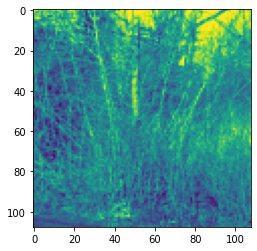

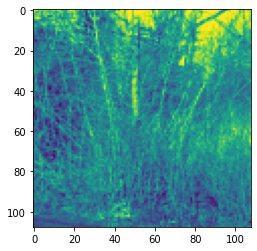

In [25]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(my_pickle.images_train[0])
plt.figure()
plt.imshow(new_pickle.images_train[0])

In [27]:
my_pickle.images_train[0],new_pickle.images_train[0]

(array([[[ 2.916134  ],
         [ 2.65535   ],
         [ 2.107224  ],
         ...,
         [ 2.8526902 ],
         [ 1.9998857 ],
         [ 2.1179209 ]],
 
        [[ 2.3823936 ],
         [ 1.2477798 ],
         [ 0.8062543 ],
         ...,
         [ 2.9733074 ],
         [ 2.7896152 ],
         [ 2.249604  ]],
 
        [[ 1.2031478 ],
         [ 1.279133  ],
         [ 1.9773852 ],
         ...,
         [ 3.066998  ],
         [ 2.9803157 ],
         [ 2.4285011 ]],
 
        ...,
 
        [[-1.3729712 ],
         [-1.5138757 ],
         [-1.3759221 ],
         ...,
         [ 0.0253775 ],
         [-0.6393084 ],
         [-2.3880742 ]],
 
        [[-1.634493  ],
         [-1.3401426 ],
         [-1.3191175 ],
         ...,
         [ 0.21275844],
         [-1.3467821 ],
         [-1.363012  ]],
 
        [[-1.9605653 ],
         [-1.745151  ],
         [-1.5216218 ],
         ...,
         [-1.1140313 ],
         [-0.28778473],
         [-0.47885427]]], dtype=float32),
 arr

In [28]:
my_pickle.responses_train[27],new_pickle.responses_train[27]

(array([0., 0., 0., 0., 0., 1., 0., 0., 1.]),
 array([0., 0., 0., 0., 0., 1., 0., 0., 1.]))

In [2]:
a=Dataset.load()

In [5]:
a.responses_test.shape

(30, 30, 41)